# Explore here

In [15]:
# Importación 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
from pickle import dump

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.linear_model import LogisticRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score

import warnings
def warn(*args, **kwargs):
    pass
warnings.warn = warn
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_columns', None)

# Cargar datos
ruta_datos = '/workspace/-rbol-de-decision/data/raw/diabetes.csv' 
diabetes = pd.read_csv(ruta_datos)

# Mostrar las primeras filas y la estructura del conjunto de datos
print("Primeras filas del conjunto de datos:")
print(diabetes.head())
print("\nEstructura del conjunto de datos:")
print(diabetes.info())


Primeras filas del conjunto de datos:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Estructura del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies

# Exploratory Data Analysis (EDA)

Nuestro dataframe contiene 768 filas y 9 características.

Primeras filas del dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Resumen de la estructura del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ---

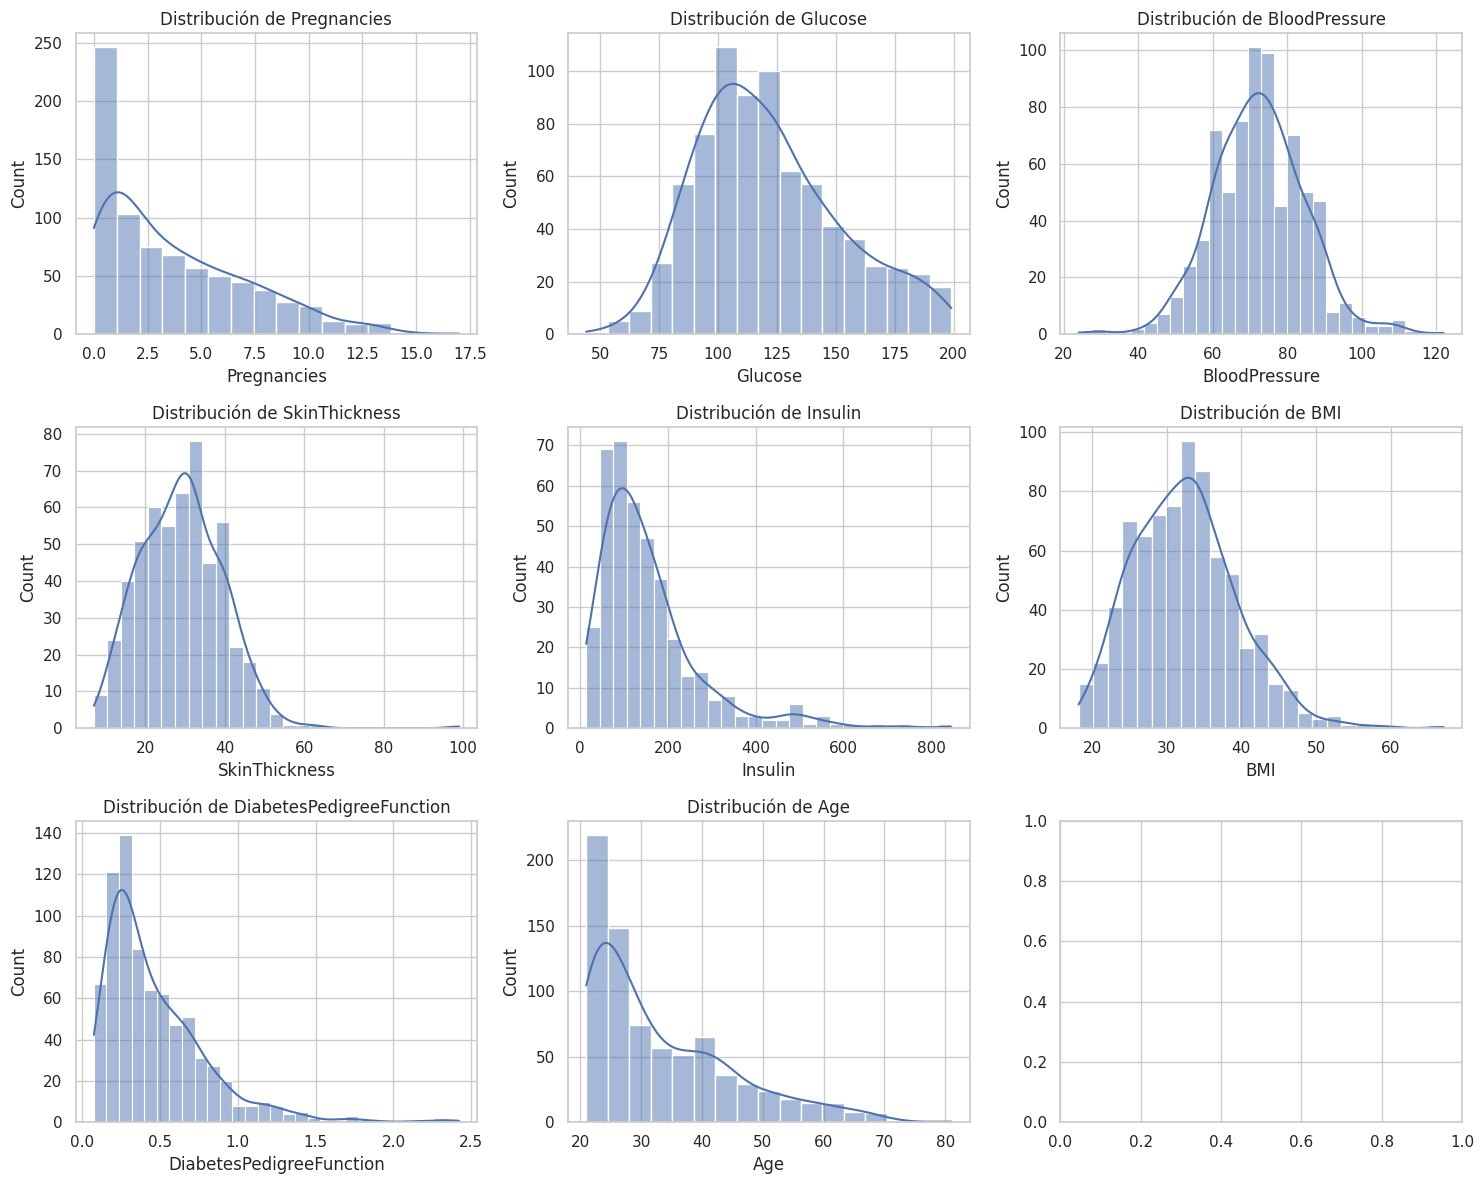

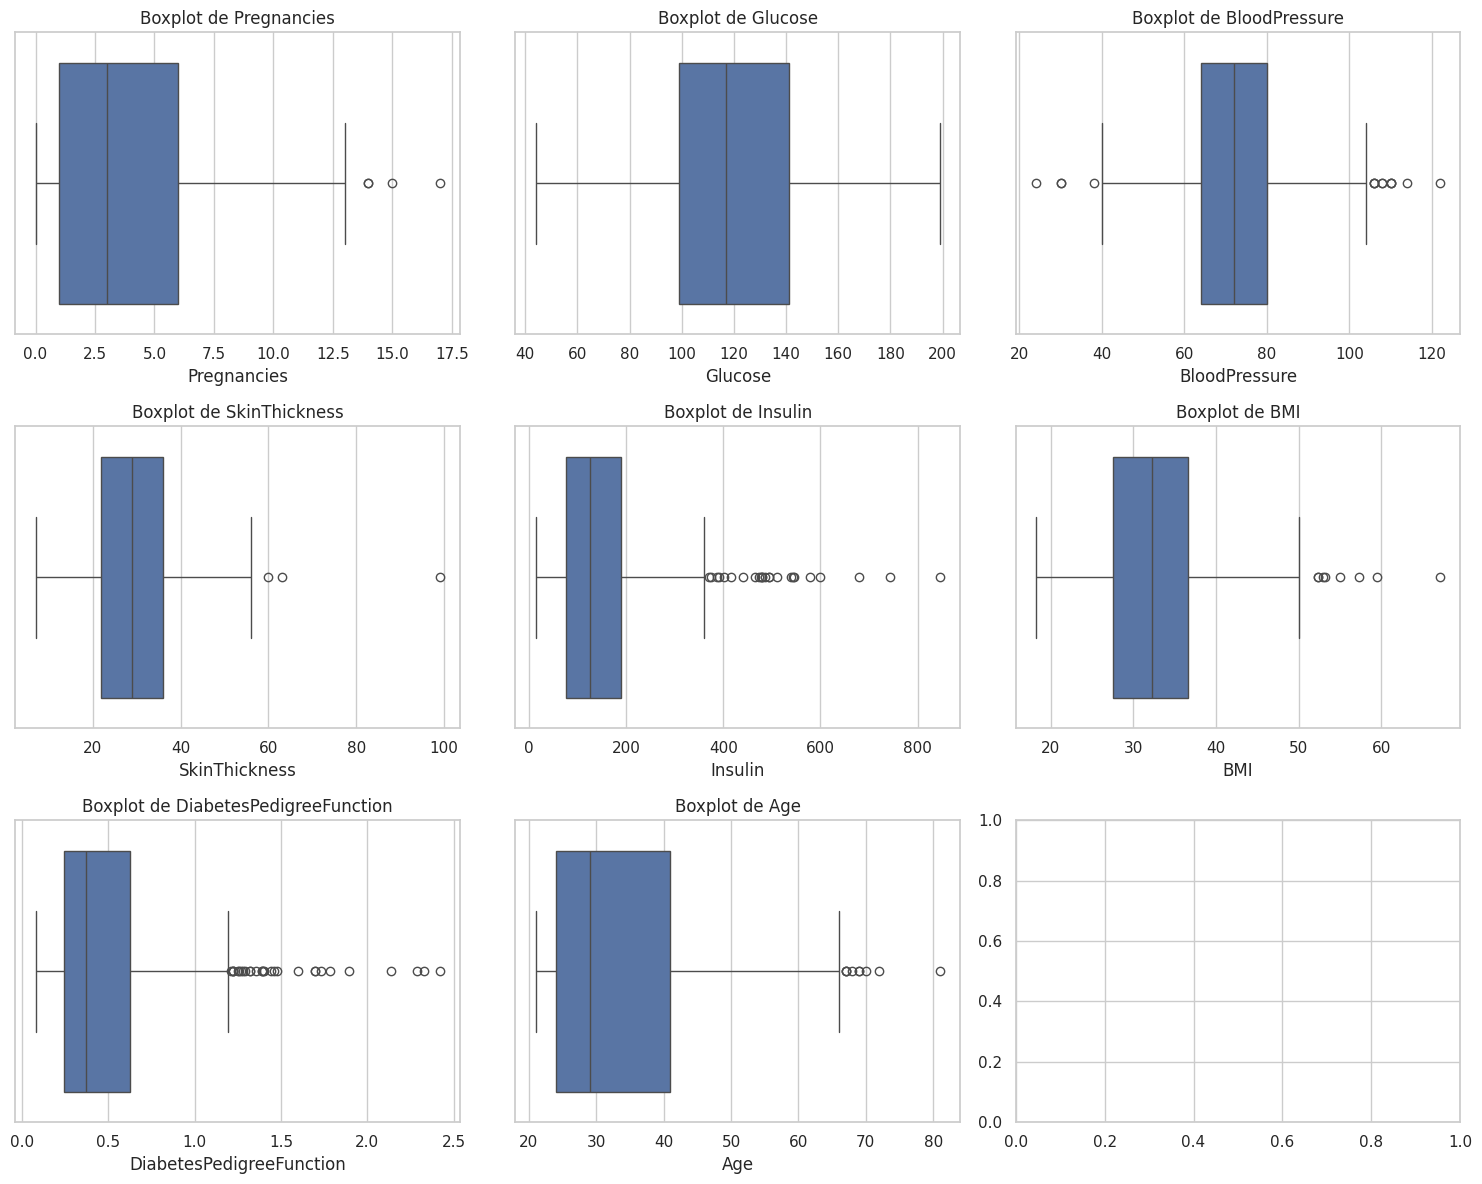

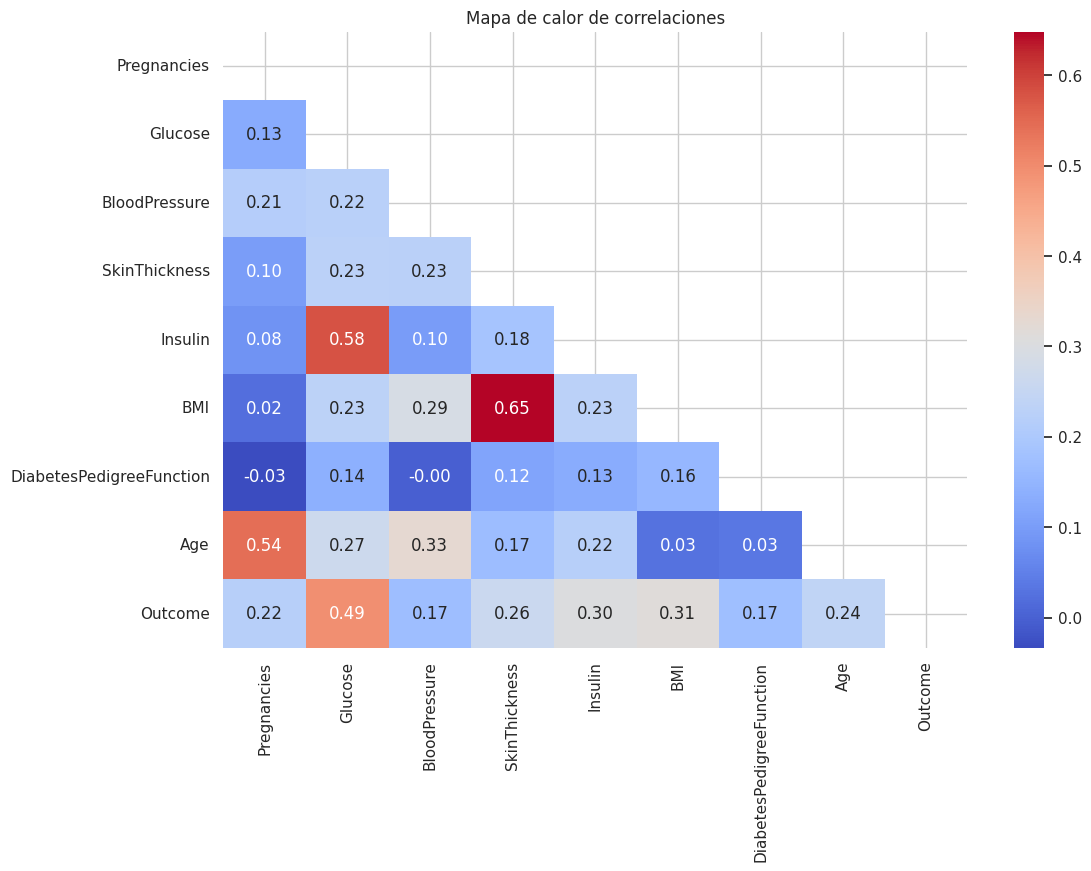

In [ ]:

# Configuración general
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)

# Cargar datos
ruta_datos = '/workspace/-rbol-de-decision/data/raw/diabetes.csv'
df = pd.read_csv(ruta_datos)

# Exploración inicial de datos
print(f"Nuestro dataframe contiene {len(df)} filas y {df.shape[1]} características.\n")
print("Primeras filas del dataset:")
print(df.head())
print("\nResumen de la estructura del conjunto de datos:")
print(df.info())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe().round(2))

# Identificación de valores nulos
print("\nConteo de valores nulos por columna:")
print(df.isnull().sum())

# Detección de ceros en variables donde no deberían existir
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in columns_with_zeros:
    print(f"{col}: {len(df[df[col] == 0])} valores de 0 encontrados.")

# Reemplazo de ceros 
df[columns_with_zeros] = df[columns_with_zeros].replace(0, np.nan)

# Visualización de distribuciones
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
for i, col in enumerate(df.columns[:-1]):  # Excluir Outcome
    sns.histplot(df[col], kde=True, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f"Distribución de {col}")
plt.tight_layout()
plt.show()

# Análisis de valores atípicos
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
for i, col in enumerate(df.columns[:-1]):
    sns.boxplot(x=df[col], ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f"Boxplot de {col}")
plt.tight_layout()
plt.show()

# Análisis multivariante
# Mapa de calor de correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", mask=np.triu(df.corr()))
plt.title("Mapa de calor de correlaciones")
plt.show()


# Preparación del modelo

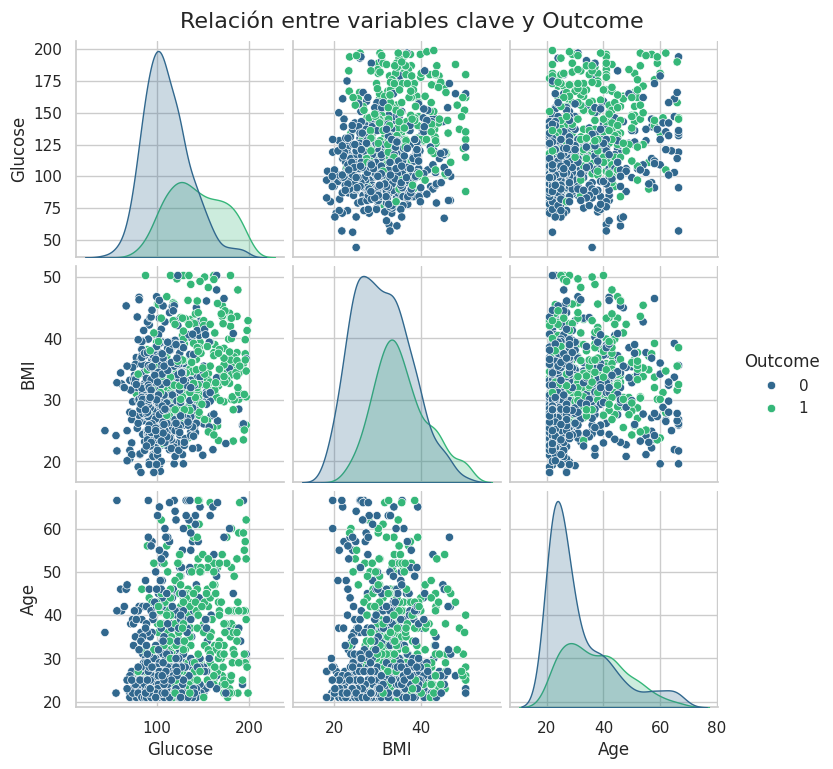

Pregnancies - Límites ajustados: [-6.50, 13.50]
Glucose - Límites ajustados: [36.00, 204.00]
BloodPressure - Límites ajustados: [40.00, 104.00]
SkinThickness - Límites ajustados: [1.00, 57.00]
Insulin - Límites ajustados: [-94.38, 360.62]
BMI - Límites ajustados: [13.85, 50.25]
DiabetesPedigreeFunction - Límites ajustados: [-0.33, 1.20]
Age - Límites ajustados: [-1.50, 66.50]
Glucose_BMI_ratio - Límites ajustados: [0.78, 6.86]
Age_Pregnancies_ratio - Límites ajustados: [-5.01, 22.21]

Primeras filas con las nuevas características:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0      NaN  33.6   
1          1.0     85.0           66.0           29.0      NaN  26.6   
2          8.0    183.0           64.0            NaN      NaN  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          0.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction   

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from joblib import dump
import numpy as np

# --- Visualización de la relación entre variables clave ---
sns.pairplot(df, hue="Outcome", vars=["Glucose", "BMI", "Age"], palette="viridis")
plt.suptitle("Relación entre variables clave y Outcome", y=1.02, fontsize=16)
plt.show()

# Manejo de outliers
def ajustar_outliers(x, feature_name):
    """
    Limita los valores atípicos a los límites intercuartílicos (IQR).
    """
    q1, q3 = x.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    print(f"{feature_name} - Límites ajustados: [{lower_limit:.2f}, {upper_limit:.2f}]")
    return x.clip(lower=lower_limit, upper=upper_limit)

# Aplicar ajuste de outliers
for col in df.select_dtypes(include=np.number).columns:
    if col != "Outcome":  # Excluir columna objetivo
        df[col] = ajustar_outliers(df[col], col)

# Creación de nuevas características
df["Glucose_BMI_ratio"] = df["Glucose"] / df["BMI"]
df["Age_Pregnancies_ratio"] = df["Age"] / (df["Pregnancies"] + 1)  # Evitar división por cero

print("\nPrimeras filas con las nuevas características:")
print(df.head())

# Preparación de datos para el modelo
# Dividir en características (X) y objetivo (y)
X = df.drop(columns="Outcome")
y = df["Outcome"]

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Normalización y escalado
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

X_train_standard = scaler_standard.fit_transform(X_train)
X_test_standard = scaler_standard.transform(X_test)

X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)

# Guardar scalers para uso futuro
dump(scaler_standard, open("/workspace/-rbol-de-decision/data/processed/scaler_standard.pkl", "wb"))
dump(scaler_minmax, open("/workspace/-rbol-de-decision/data/processed/scaler_minmax.pkl", "wb"))

# Guardar conjuntos escalados para pruebas futuras
dump(X_train_minmax, "/workspace/-rbol-de-decision/data/processed/minmax_with_outliers.sav")
dump(X_train_standard, "/workspace/-rbol-de-decision/data/processed/standard_with_outliers.sav")

print("\nConjuntos de datos preparados para modelado.")
print(f"X_train_minmax shape: {X_train_minmax.shape}")
print(f"X_train_standard shape: {X_train_standard.shape}")

# Revisar si va bien el escalado
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Asegúrate de haber escalado correctamente los datos antes de usarlos
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

# Escalar los datos
X_train_with_outliers_norm = pd.DataFrame(
    scaler_standard.fit_transform(X_train_with_outliers),
    columns=X_train_with_outliers.columns
)
X_test_with_outliers_norm = pd.DataFrame(
    scaler_standard.transform(X_test_with_outliers),
    columns=X_test_with_outliers.columns
)

X_train_without_outliers_norm = pd.DataFrame(
    scaler_standard.fit_transform(X_train_without_outliers),
    columns=X_train_without_outliers.columns
)
X_test_without_outliers_norm = pd.DataFrame(
    scaler_standard.transform(X_test_without_outliers),
    columns=X_test_without_outliers.columns
)

# MinMaxScaler
X_train_with_outliers_minmax = pd.DataFrame(
    scaler_minmax.fit_transform(X_train_with_outliers),
    columns=X_train_with_outliers.columns
)
X_test_with_outliers_minmax = pd.DataFrame(
    scaler_minmax.transform(X_test_with_outliers),
    columns=X_test_with_outliers.columns
)

X_train_without_outliers_minmax = pd.DataFrame(
    scaler_minmax.fit_transform(X_train_without_outliers),
    columns=X_train_without_outliers.columns
)
X_test_without_outliers_minmax = pd.DataFrame(
    scaler_minmax.transform(X_test_without_outliers),
    columns=X_test_without_outliers.columns
)

# Confirmar las formas de los conjuntos escalados
print("Datos escalados correctamente:")
print(f"X_train_with_outliers_norm shape: {X_train_with_outliers_norm.shape}")
print(f"X_test_with_outliers_norm shape: {X_test_with_outliers_norm.shape}")

# Filtrar columnas seleccionadas en los conjuntos escalados
X_train_with_outliers_norm_sel = X_train_with_outliers_norm[X_train_with_outliers_sel.columns]
X_train_without_outliers_norm_sel = X_train_without_outliers_norm[X_train_without_outliers_sel.columns]

X_test_with_outliers_norm_sel = X_test_with_outliers_norm[X_test_with_outliers_sel.columns]
X_test_without_outliers_norm_sel = X_test_without_outliers_norm[X_test_with_outliers_sel.columns]

X_train_with_outliers_minmax_sel = X_train_with_outliers_minmax[X_train_with_outliers_sel.columns]
X_train_without_outliers_minmax_sel = X_train_without_outliers_minmax[X_train_without_outliers_sel.columns]

X_test_with_outliers_minmax_sel = X_test_with_outliers_minmax[X_test_with_outliers_sel.columns]
X_test_without_outliers_minmax_sel = X_test_without_outliers_minmax[X_test_with_outliers_sel.columns]


# Modelo de árbol de decisión: Reestructuración

In [ ]:
import pandas as pd

# Ruta del archivo
ruta_datos = '/workspace/-rbol-de-decision/data/raw/diabetes.csv'

# Cargar los datos
diabetes = pd.read_csv(ruta_datos)

# Confirmar que se cargaron los datos
print(diabetes.head())
print(diabetes.info())

# Separar características (X) y variable objetivo (y)
X = diabetes.drop(columns='Outcome')  # Asegúrate de que 'Outcome' sea el nombre correcto de la columna objetivo
y = diabetes['Outcome']

# División de datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Normalización
def norm(X_train, X_test):
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_norm = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test_norm = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    return X_train_norm, X_test_norm

X_train_norm, X_test_norm = norm(X_train, X_test)

# Modelado
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(random_state=123)
model.fit(X_train_norm, y_train)
y_pred = model.predict(X_test_norm)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo: {accuracy:.4f}")


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

# Entrenar el modelo

Fitting 3 folds for each of 128 candidates, totalling 384 fits


/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Mejores hiperparámetros encontrados: {'max_depth': 10, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.025, 'random_state': 123, 'splitter': 'best'}
Accuracy del modelo optimizado: 0.7857
Matriz de confusión:
[[87  9]
 [24 34]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        96
           1       0.79      0.59      0.67        58

    accuracy                           0.79       154
   macro avg       0.79      0.75      0.76       154
weighted avg       0.79      0.79      0.78       154



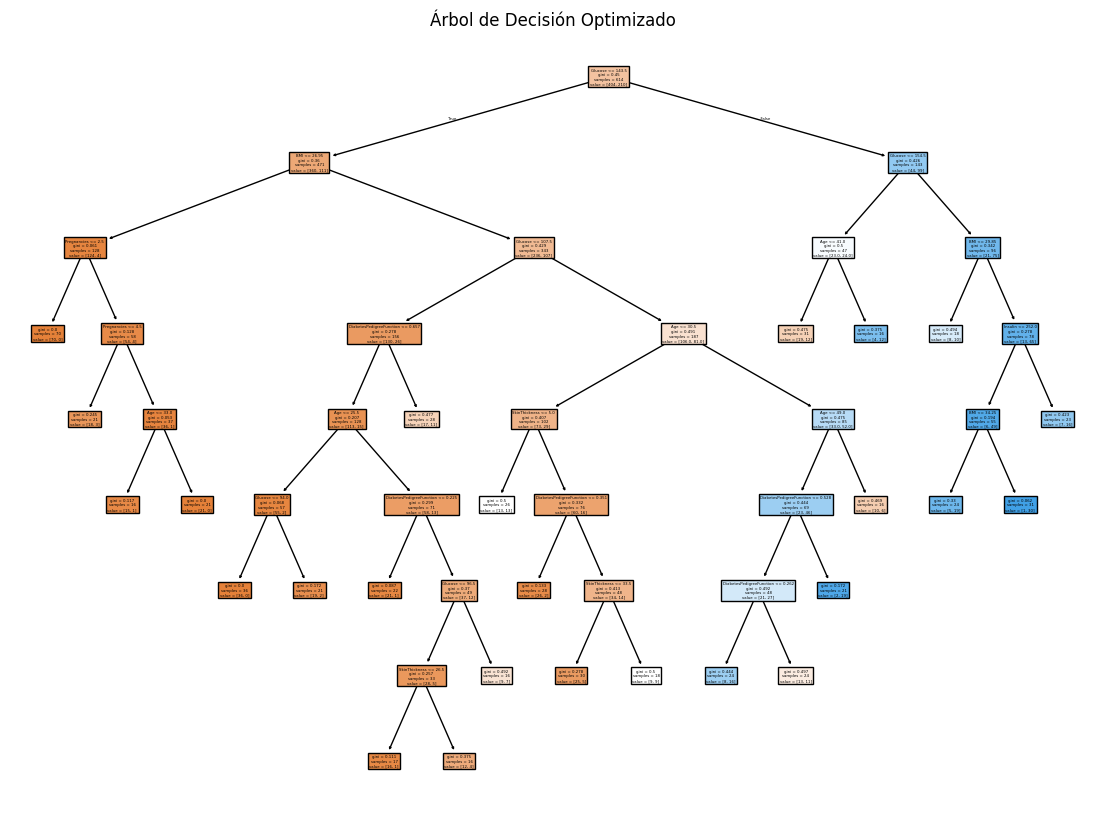

Reglas del Árbol de Decisión Optimizado:
|--- Glucose <= 143.50
|   |--- BMI <= 26.95
|   |   |--- Pregnancies <= 2.50
|   |   |   |--- class: 0
|   |   |--- Pregnancies >  2.50
|   |   |   |--- Pregnancies <= 4.50
|   |   |   |   |--- class: 0
|   |   |   |--- Pregnancies >  4.50
|   |   |   |   |--- Age <= 33.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Age >  33.00
|   |   |   |   |   |--- class: 0
|   |--- BMI >  26.95
|   |   |--- Glucose <= 107.50
|   |   |   |--- DiabetesPedigreeFunction <= 0.66
|   |   |   |   |--- Age <= 25.50
|   |   |   |   |   |--- Glucose <= 94.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Glucose >  94.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- Age >  25.50
|   |   |   |   |   |--- DiabetesPedigreeFunction <= 0.23
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- DiabetesPedigreeFunction >  0.23
|   |   |   |   |   |   |--- Glucose <= 96.50
|   |   |   |   |   |   |   |--- SkinThickness <= 2

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# --- Optimización del modelo ---
# Definimos los hiperparámetros a explorar
hyperparams = {
    "splitter": ["best", "random"],
    "max_depth": [10, 15, 20, 25],
    "min_samples_split": [2, 3, 4, 5],
    "min_weight_fraction_leaf": [0.0, 0.01, 0.025, 0.05],
    "random_state": [123],
}

# Crear modelo base
base_model = DecisionTreeClassifier()

# Grid Search para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(estimator=base_model, param_grid=hyperparams, scoring="accuracy", cv=3, verbose=1)
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros
print(f"Mejores hiperparámetros encontrados: {grid_search.best_params_}")

# Entrenar el modelo con los mejores hiperparámetros
optimized_model = grid_search.best_estimator_
optimized_model.fit(X_train, y_train)

# Predicciones con el modelo optimizado
y_pred_optimized = optimized_model.predict(X_test)

# Calcular métricas de desempeño
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
print(f"Accuracy del modelo optimizado: {accuracy_optimized:.4f}")

# --- Métricas adicionales ---
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_optimized)
print("Matriz de confusión:")
print(conf_matrix)

# Reporte de clasificación
class_report = classification_report(y_test, y_pred_optimized)
print("Reporte de clasificación:")
print(class_report)

# --- Visualización del árbol optimizado ---
plt.figure(figsize=(14, 10))
plot_tree(optimized_model, feature_names=X_train.columns, filled=True)
plt.title("Árbol de Decisión Optimizado")
plt.show()

# Mostrar reglas del árbol
rules = export_text(optimized_model, feature_names=list(X_train.columns))
print("Reglas del Árbol de Decisión Optimizado:")
print(rules)
